## Tarefa 3 - Modelo de credit Score em Python

Fazer um modelo de classificação para a variável “mau pagador” na base de dados do banco alemão em Python. O modelo deve conter pelo menos 3 variáveis preditoras.
A base de dados está disponível em https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) (Links to an external site.). Deve ser  usada uma parte para treino e outra para teste.
Deve ser usado Análise de Regressão Logística.
Deve ser entregue um arquivo com o código em python e outro com um breve relatório onde é descrito o objetivo da modelagem, as variáveis utilizadas, a matriz de confusão, e o percentual de acurácia do modelo na base de teste com cada um dos dois tipos de técnica.


# NOME: MARCIO DE LIMA

## Objetivo

Essa tarefa tem como objetivo a criação de um modelo de machine-learning de Regressão Logística que fará uma predição de clientes serem "mau pagadores" ou "bom pagadores". O dataset pertence há um banco alemão. Essa tarefa apresentará os fontes e os resultados passo a passo assim como gráficos e os resultados de acurária do modelo. 

In [65]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")


In [66]:
# Importando o arquivo 
df = pd.read_csv('data/data_german_bank.csv', sep=";")
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,pagador
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
4,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
5,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
6,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
7,A12,12,A32,A43,1567,A61,A73,1,A92,A101,...,A123,22,A143,A152,1,A173,1,A192,A201,1
8,A11,15,A32,A40,1403,A61,A73,2,A92,A101,...,A123,28,A143,A151,1,A173,1,A191,A201,1
9,A14,24,A34,A43,2424,A65,A75,4,A93,A101,...,A122,53,A143,A152,2,A173,1,A191,A201,1


In [68]:
# Quantidade de bons e maus pagadores
df['pagador'].value_counts()

1    4230
2     900
Name: pagador, dtype: int64

In [69]:
df.dtypes

A1         object
A2          int64
A3         object
A4         object
A5          int64
A6         object
A7         object
A8          int64
A9         object
A10        object
A11         int64
A12        object
A13         int64
A14        object
A15        object
A16         int64
A17        object
A18         int64
A19        object
A20        object
pagador     int64
dtype: object

In [70]:
#Analise das variaveis numericas
df.describe()

,A2,A5,A8,A11,A13,A16,A18,pagador
count,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000,5130.000000
mean,20.209747,3154.789279,2.950292,2.845809,35.846394,1.414230,1.155945,1.175439
std,11.687558,2657.757634,1.121784,1.104859,11.385694,0.580565,0.362839,0.380379
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1374.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2288.000000,3.000000,3.000000,33.500000,1.000000,1.000000,1.000000
75%,24.000000,3850.000000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


# Observações

Baseado no arquivo das descrições das variáveis categóricas do csv, decidi transformar os dados string em dados numéricos através de faixas e de valores Sim (1) ou Não (0). O Objetivo é melhorar a acurácia do modelo preditivo. Abaixo segue as variáveis escolhidas nessa primeira transformação. 

A1 - Status da conta corrente
A3 - Histórico de Crédito
A6 - Conta poupança
A7 - Tempo no atual emprego
A9 - Estado Civil e Sexo
10 - Garantia
19 - Possui Telefone
20 - Trabalhador Estrangeiro

In [71]:
#Tranformando os dados qualitativos

# A1 será 0 se tivemos saldo positivo, e será 1 se tiver saldo negativo ou não existir
df['A1']= np.where(((df['A1']=='A12')| (df['A1']=='A13')),0,1)

# A3 será 0 se tivemos historicos positivos ou sem histórico, e será 1 se tiver histórico ruim.
df['A3']= np.where(((df['A3']=='A33')| (df['A3']=='A34')),1,0)

# A6 será 0 se investimentos forem nulos ou baixos, e será 1 se forem regulares ou altos
df['A6']= np.where(((df['A6']=='A61')| (df['A6']=='A65')),0,1)

# A7 será 0 se estiver sem emprego, e será 1 se tiver emprego
df['A7']= np.where((df['A7']=='A71'),0,1)

# A9 será transformada somente em variável de sexo, 0 se for M e 1 se for F
df['A9']= np.where(((df['A9']=='A95')| (df['A9']=='A92')),1,0)

# A10 será 0 se não houver garantia, e será 1 se sim
df['A10']= np.where(((df['A10']=='A101')),0,1)

# A19 será 0 se o cliente não tiver telefone e 1 se tiver
df['A19']= np.where((df['A19']=='A191'),0,1)

# A20 será 0 se o cliente não for trabalhador estrangeiro e 1 se for
df['A20']= np.where((df['A20']=='A202'),0,1)

# Variavel Target
df['pagador']= np.where((df['pagador']==1),0,1)


In [72]:
# Quantidade de bons e maus pagadores
df['pagador'].value_counts()

0    4230
1     900
Name: pagador, dtype: int64

In [73]:
#Checando valores NA nos dados
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [74]:
#Limpando as variaveis que não serão utilizadas
del df['A4']
del df['A12']
del df['A14']
del df['A15']
del df['A17']

In [75]:
df.head(25)

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A13,A16,A18,A19,A20,pagador
0,1,6,1,1169,0,1,4,0,0,4,67,2,1,1,1,0
1,1,12,1,2096,0,1,2,0,0,3,49,1,2,0,1,0
2,1,42,0,7882,0,1,2,0,1,4,45,1,2,0,1,0
3,1,36,0,9055,0,1,2,0,0,4,35,1,2,1,1,0
4,1,24,0,2835,1,1,3,0,0,4,53,1,1,0,1,0
5,0,36,0,6948,0,1,2,0,0,2,35,1,1,1,1,0
6,1,12,0,3059,1,1,2,0,0,4,61,1,1,0,1,0
7,0,12,0,1567,0,1,1,1,0,1,22,1,1,1,1,0
8,1,15,0,1403,0,1,2,1,0,4,28,1,1,0,1,0
9,1,24,1,2424,0,1,4,0,0,4,53,2,1,0,1,0


# Gerando gráficos para analise das variaveis

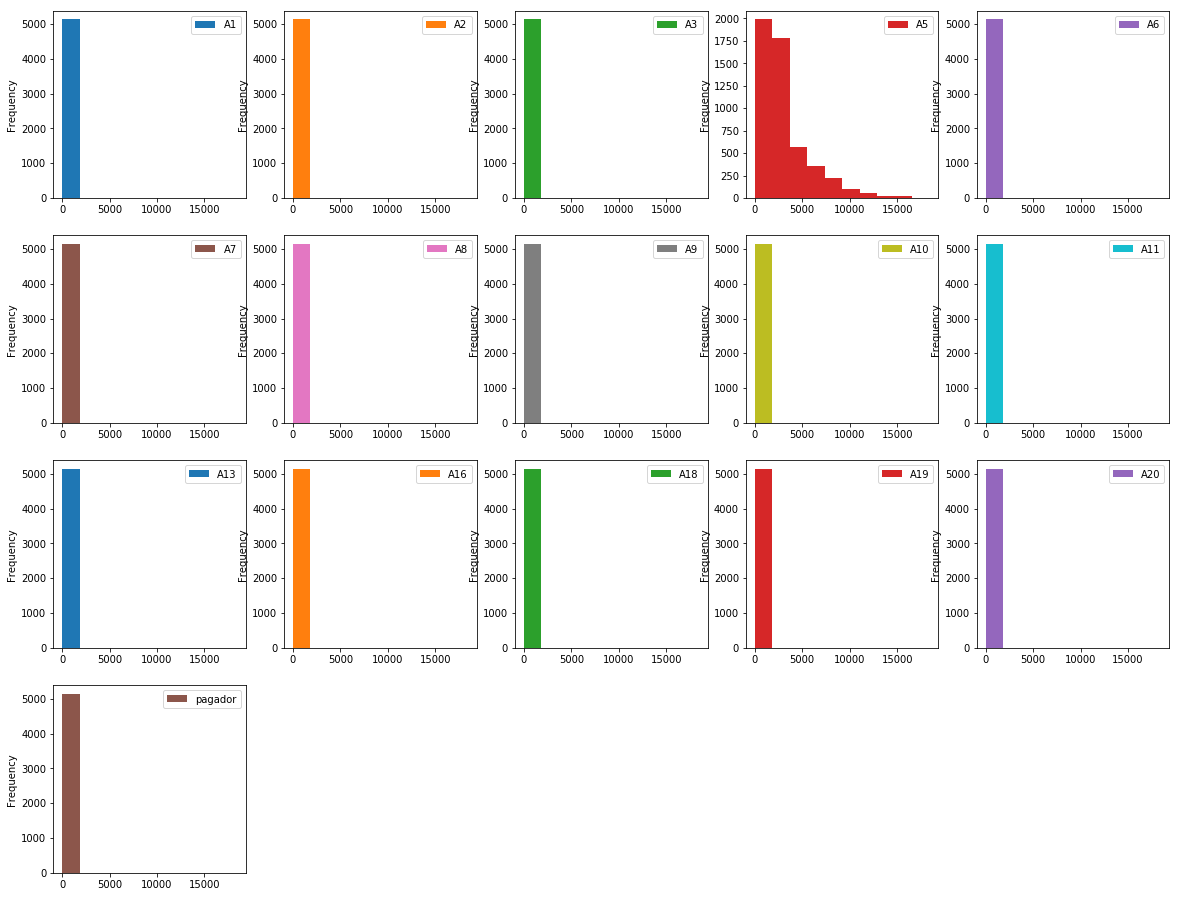

In [76]:
#Histogramas
df.plot(kind = 'hist', subplots = True, layout = (5,5), sharex = False, figsize=(20,20))
plt.show()

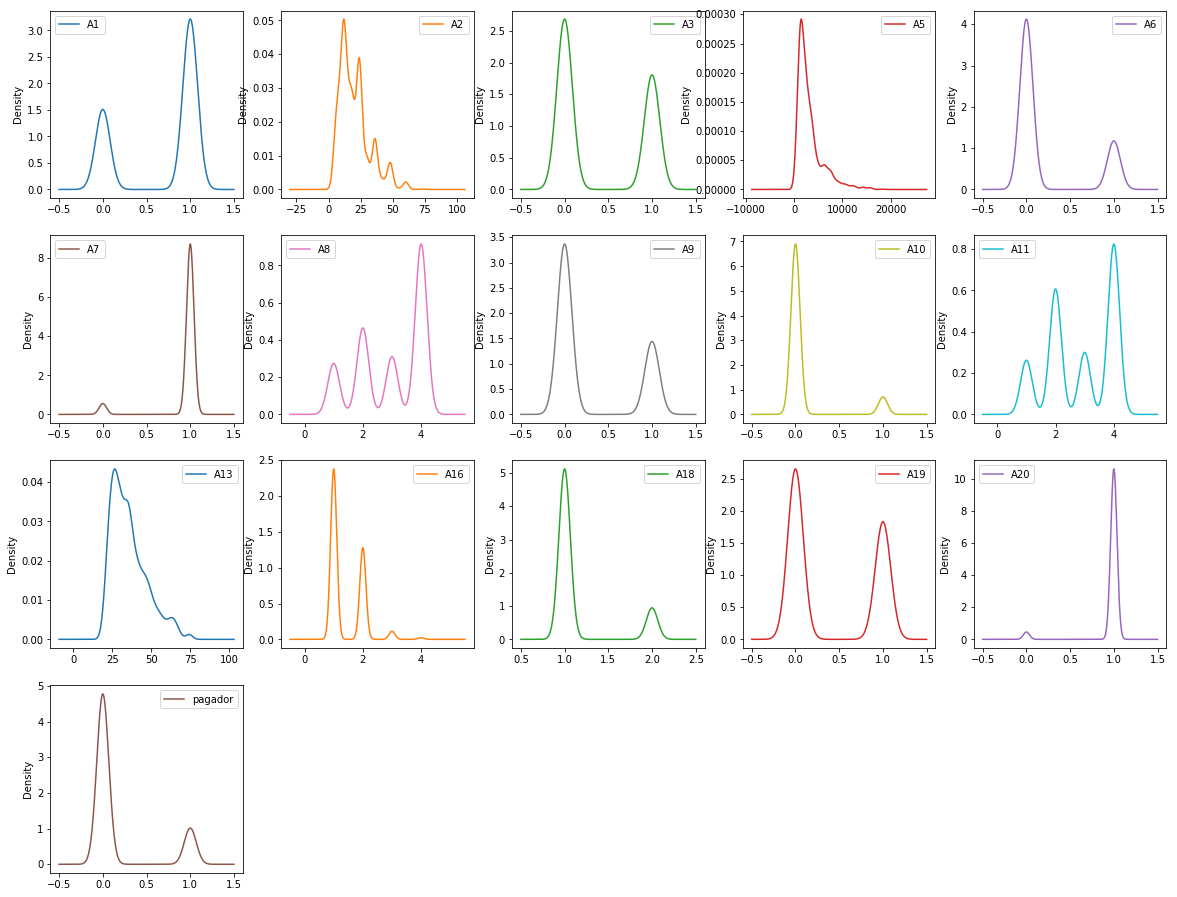

In [77]:
#Gráfico de Densidade
df.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize=(20,20))
plt.show()

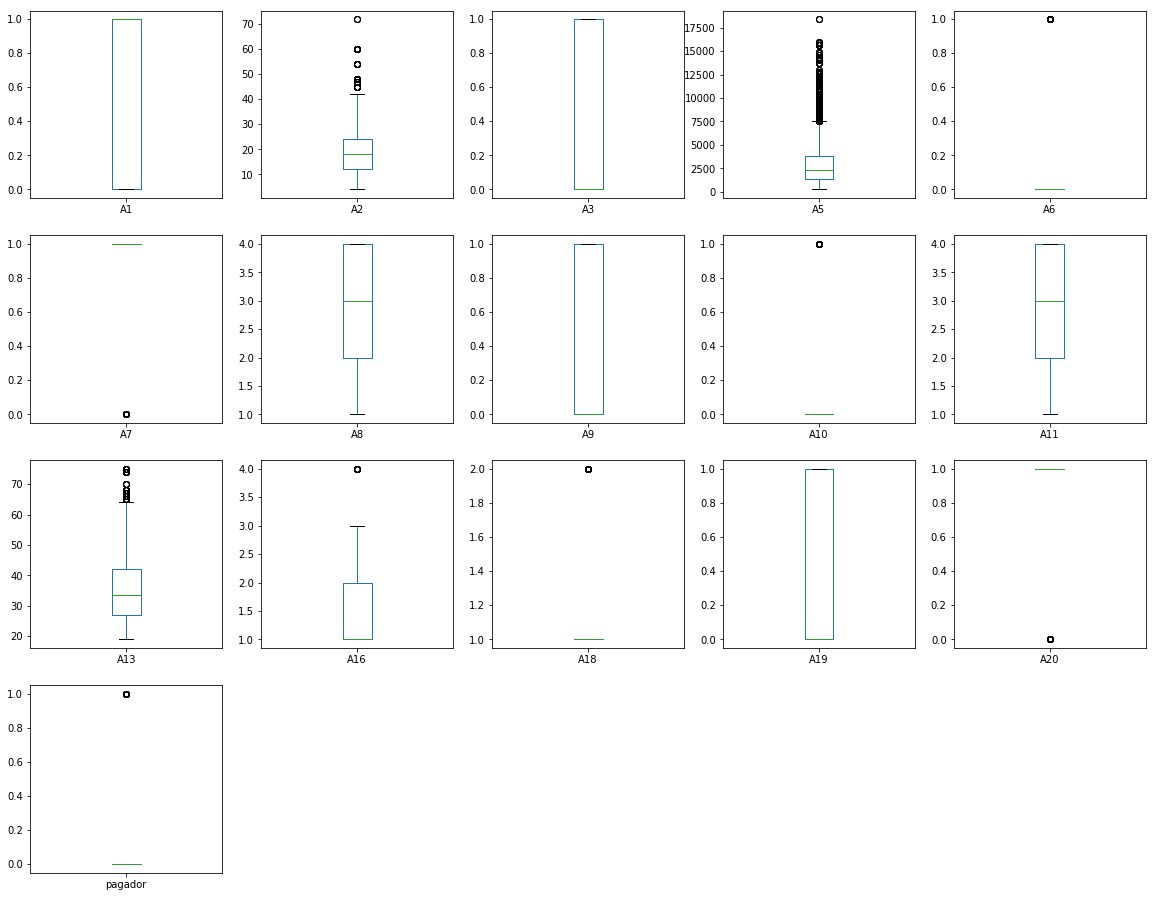

In [78]:
#Box-Plots
df.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize=(20,20))
plt.show()

In [80]:
# Correlação com Pagador
df.corrwith(df.pagador, axis = 0) 

A1        -0.076138
A2         0.183547
A3        -0.133546
A5         0.135965
A6        -0.057544
A7        -0.032714
A8         0.060193
A9         0.063957
A10        0.001179
A11        0.001750
A13       -0.076295
A16       -0.037793
A18       -0.003321
A19       -0.029762
A20        0.064564
pagador    1.000000
dtype: float64

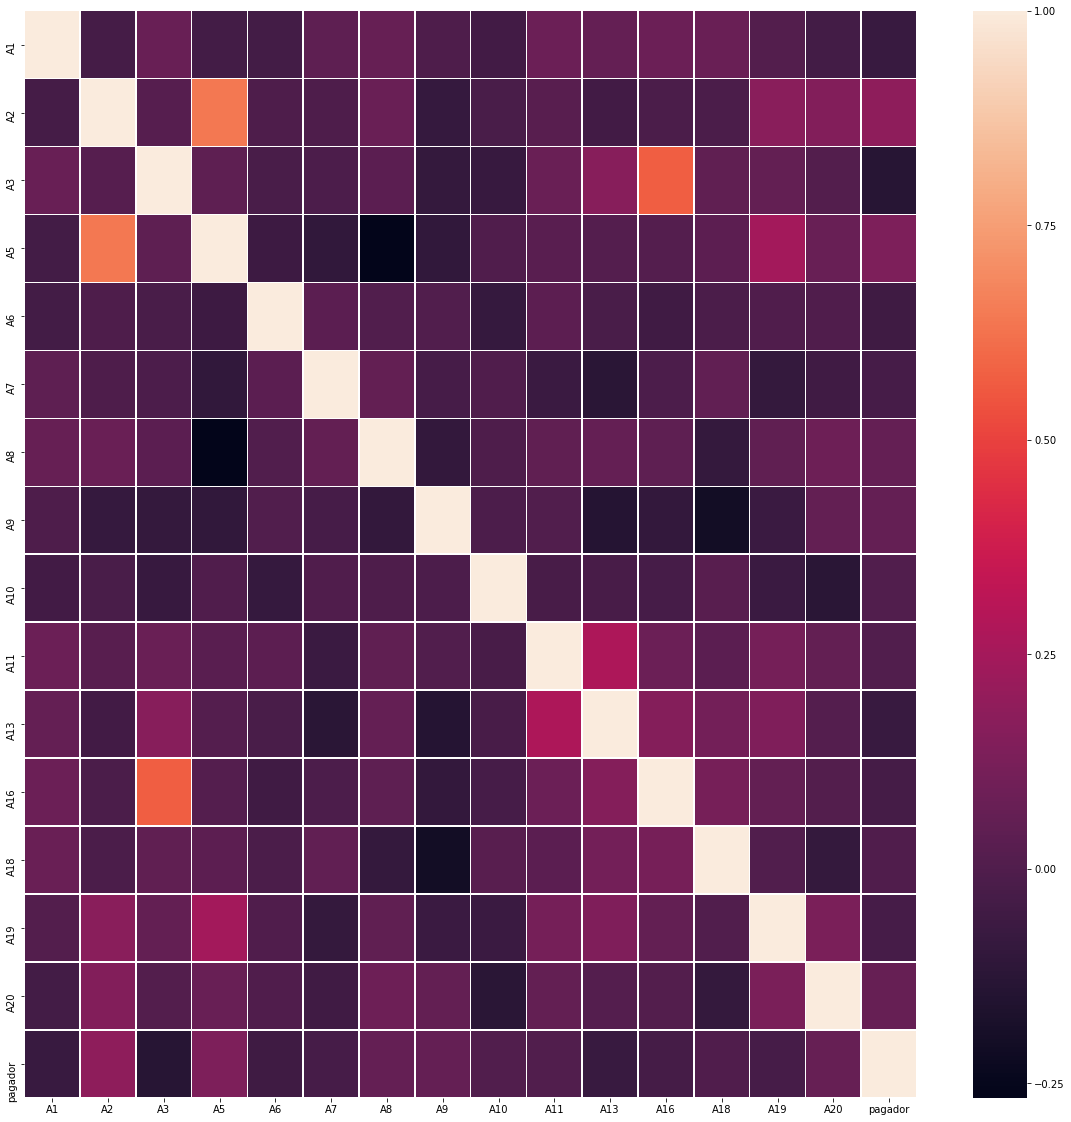

In [81]:
# Construindo um gráfico de HEATMAP
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(),linewidths=.5, ax=ax)

## Escolha das varíaveis do modelo preditivo

Após análises das variáveis por correlação e análise descritiva e dos gráficos acima, foram escolhidas as varíaveis abaixo para o trabalho. 

São elas: 
    
    A2
    A3
    A5
    A6
    A8
    A9
    A13
    A16
    A19
    A20    

In [82]:
# Balanceando o dataset para não gerar overfiting
df_0 = df[df.pagador==0]
df_1 = df[df.pagador==1]

df_amostra_0=df_0.sample(n=900)


In [83]:
dfb= pd.concat([df_amostra_0, df_1])
dfb['pagador'].value_counts()

1    900
0    900
Name: pagador, dtype: int64

In [84]:
dfb.head(5)

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A13,A16,A18,A19,A20,pagador
1308,1,21,1,1591,1,1,4,0,0,3,34,2,1,0,1,0
1494,0,30,1,2503,1,1,4,0,0,2,41,2,1,0,1,0
3932,1,15,1,5045,0,1,1,1,0,4,59,1,1,1,1,0
455,0,30,0,4221,0,1,2,1,0,1,28,2,1,0,1,0
4644,0,10,0,1521,0,1,4,0,0,2,31,1,1,0,1,0


In [86]:
#Gerando dados de Treino e de Teste para os modelos
from sklearn.model_selection import train_test_split

X = dfb.iloc[:,[1,2,3,4,6,7,10,11,13,14]]
Y = dfb.iloc[:,15]

seed = 1313
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.30, random_state = seed)

In [87]:
X.head(5)

,A2,A3,A5,A6,A8,A9,A13,A16,A19,A20
1308,21,1,1591,1,4,0,34,2,0,1
1494,30,1,2503,1,4,0,41,2,0,1
3932,15,1,5045,0,1,1,59,1,1,1
455,30,0,4221,0,2,1,28,2,0,1
4644,10,0,1521,0,4,0,31,1,0,1


In [88]:
#Função utilitária
def plot_confusion_matrix(cm, title='Matriz de Confusao', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()    
    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predição')
    plt.show

# Modelo 1 - Regressão Logística

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Modelo - Versao 1
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, y_treino)

y_pred = modelo.predict(X_teste)

#Resultado do Modelo - Versao 1
resultado = accuracy_score(y_teste, y_pred)

print("Acurácia nos Dados de Teste: %.3f%%" % (resultado * 100.0))


Acurácia nos Dados de Teste: 64.259%


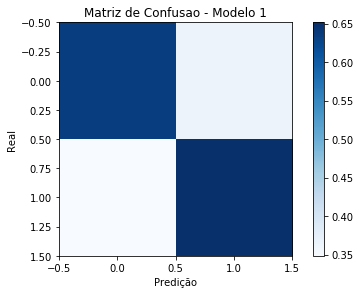

In [90]:
#Gerando a matriz de Confusao - Gráfico
cm= confusion_matrix(y_teste, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, title='Matriz de Confusao - Modelo 1')

# Modelo 1 - LogisticRegression - Resultado => 64.26%

In [91]:
#Criando o modelo 2 - XGBClassifier

#!pip install xgboost
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

modelo2 = XGBClassifier(n_estimators=110, nthread=-1, seed=seed)

# Treinando o modelo
modelo2.fit(X_treino, y_treino, eval_metric="auc", verbose = False)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=110, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=1313, silent=None, subsample=1, verbosity=1)

In [92]:
# Fazendo previsões
y_pred = modelo2.predict(X_teste)
previsoes = [round(value) for value in y_pred]


In [93]:
#Resultado do Modelo - Versao 2
resultado2 = accuracy_score(y_teste, previsoes)
print("Acuracia do Modelo 2: %.3f" % (resultado2 * 100.0))

Acuracia do Modelo 2: 73.704


In [99]:
print(pd.crosstab(y_teste, y_pred,rownames=['Reais'],colnames=['Previstos'], margins=True))

Previstos    0    1  All
Reais                   
0          178   98  276
1           49  215  264
All        227  313  540


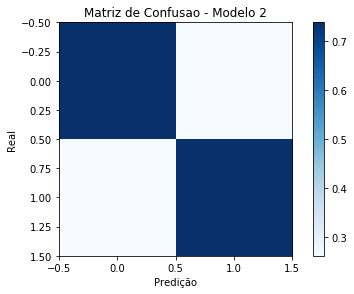

In [94]:
#Gerando a matriz de Confusao - Gráfico
cm= confusion_matrix(y_teste, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, title='Matriz de Confusao - Modelo 2')

# Modelo 2 - XGBClassifier - Resultado => 73.70%

In [95]:
# Criando Modelo 3 - DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

modelo3 = tree.DecisionTreeClassifier(criterion='gini',max_depth=15,
                                   min_samples_leaf=5)

#Treino
modelo3.fit(X_treino, y_treino)

#Predicoes
y_pred = modelo3.predict(X_teste)

#Resultado do Modelo - Versao 3
resultado3 = accuracy_score(y_teste, y_pred)
print("Acuracia do Modelo 3: %.3f" % (resultado3 * 100.0))

Acuracia do Modelo 3: 72.778


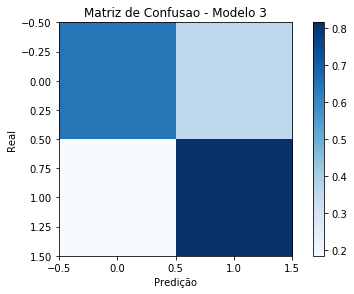

In [96]:
#Gerando a matriz de Confusao - Gráfico
cm= confusion_matrix(y_teste, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, title='Matriz de Confusao - Modelo 3')

# Modelo 3 - DecisionTreeClassifier - Resultado => 72.78%

# Conclusão
O Melhor modelo (maior acurácia) foi o modelo 2 - XGBClassifier cujo resultado foi: 73.70%
Pela análise da matriz de confusão, percebemos que temos uma maior assertividade (82%) nas predições de "mau" pagador. A acurácia foi considerada satisfatória (acima de 70%). 

## FIM
## OBRIGADO